<a href="https://colab.research.google.com/github/hammadkhann/Effective-Dense-Retrieval/blob/main/Neural_Reranking(RD2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pyterrier Setup**

In [1]:
!pip -q install python-terrier
import pyterrier as pt
pt.init()

     |████████████████████████████████| 95 kB 2.4 MB/s 
     |████████████████████████████████| 1.1 MB 26.4 MB/s 
     |████████████████████████████████| 69 kB 7.1 MB/s 
     |████████████████████████████████| 255 kB 47.6 MB/s 
     |████████████████████████████████| 294 kB 44.9 MB/s 
     |████████████████████████████████| 596 kB 41.8 MB/s 
     |████████████████████████████████| 1.8 MB 36.4 MB/s 
     |████████████████████████████████| 72 kB 1.4 MB/s 
     |████████████████████████████████| 126 kB 54.1 MB/s 
     |████████████████████████████████| 6.3 MB 32.0 MB/s 
     |████████████████████████████████| 291 kB 37.5 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done
PyTerrier 0.7.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)


## **Importing useful libraries**



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle
from google.colab import drive
from pyterrier.measures import *

pd.options.display.max_rows = None
pd.options.display.max_columns = None

## **Connect Google Drive**


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Preparing testing dataset**

## **DPH(Sparse Retrieval)**

## TREC-2019

In [4]:
br = pt.BatchRetrieve.from_dataset('msmarco_passage', 'terrier_stemmed_text', num_results=100, metadata = ['docno', 'text'], verbose=True)

/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:273: UserWarning: Downloading index of > 2GB.
  warn("Downloading index of > 2GB.")


data.direct.bf:   0%|          | 0.00/486M [00:00<?, ?iB/s]

data.document.fsarrayfile:   0%|          | 0.00/177M [00:00<?, ?iB/s]

data.inverted.bf:   0%|          | 0.00/377M [00:00<?, ?iB/s]

data.lexicon.fsomapfile:   0%|          | 0.00/100M [00:00<?, ?iB/s]

data.lexicon.fsomaphash:   0%|          | 0.00/0.99k [00:00<?, ?iB/s]

data.lexicon.fsomapid:   0%|          | 0.00/4.47M [00:00<?, ?iB/s]

data.meta-0.fsomapfile:   0%|          | 0.00/295M [00:00<?, ?iB/s]

data.meta.idx:   0%|          | 0.00/67.5M [00:00<?, ?iB/s]

data.meta.zdata:   0%|          | 0.00/1.91G [00:00<?, ?iB/s]

data.properties:   0%|          | 0.00/4.33k [00:00<?, ?iB/s]

md5sums:   0%|          | 0.00/537 [00:00<?, ?iB/s]

18:14:25.550 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1.9 GiB of memory would be required.


In [5]:
dph_2019 = pd.DataFrame()
topics = pt.get_dataset('msmarco_passage').get_topics('test-2019')
topics = pt.get_dataset('msmarco_passage').get_qrels('test-2019')[["qid"]].drop_duplicates().merge(topics, on=['qid'])
for res in br.transform_gen(topics, batch_size=10):
  dph_2019 = dph_2019.append(res)
print("Number of topics: ", len(topics))

msmarco-test2019-queries.tsv.gz:   0%|          | 0.00/4.18k [00:00<?, ?iB/s]

2019qrels-docs.txt:   0%|          | 0.00/183k [00:00<?, ?iB/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/3 [00:00<?, ?q/s]

Number of topics:  43


In [6]:
dph_2019.shape

(4205, 7)

## TREC-2020

In [7]:
dph_2020 = pd.DataFrame()
topics = pt.get_dataset('msmarco_passage').get_topics('test-2020')
topics = pt.get_dataset('msmarco_passage').get_qrels('test-2020')[["qid"]].drop_duplicates().merge(topics, on=['qid'])
for res in br.transform_gen(topics, batch_size=10):
  dph_2020 = dph_2020.append(res)
  
print("Number of topics: ", len(topics))

msmarco-test2020-queries.tsv.gz:   0%|          | 0.00/4.03k [00:00<?, ?iB/s]

2020qrels-docs.txt:   0%|          | 0.00/213k [00:00<?, ?iB/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/10 [00:00<?, ?q/s]

BR(DPH):   0%|          | 0/4 [00:00<?, ?q/s]

Number of topics:  54


In [8]:
dph_2020.shape

(5329, 7)

## **ColBERT(Dense Retrieval)**

## TREC-2019

In [9]:
index = pt.IndexFactory.of(pt.get_dataset("msmarco_passage").get_index("terrier_stemmed_text"))
print(index.getCollectionStatistics())

18:14:42.281 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1.9 GiB of memory would be required.
Number of documents: 8841823
Number of terms: 1170682
Number of postings: 215238456
Number of fields: 1
Number of tokens: 288759529
Field names: [text]
Positions:   false



In [10]:
colbert_2019 = pt.io.read_results("/content/drive/MyDrive/E2E.2019.res")
# get document text for each docid
meta = index.getMetaIndex()
text = []
for index, row in colbert_2019.iterrows():
    text.append(meta.getItem('text', int(row['docno'])))
colbert_2019['text'] = text

# get query for each qid
topics_2019 = pt.get_dataset('msmarco_passage').get_topics('test-2019')
colbert_2019 = pd.merge(colbert_2019, topics_2019, on='qid', how='left')

# filter queries on 43 topics
colbert_2019 = colbert_2019[colbert_2019['qid'].isin(dph_2019['qid'].unique())]
# filter data on top100 results for each 43 topics
colbert_2019 = colbert_2019.groupby('qid').apply(lambda x : x.sort_values(by = 'score', ascending = False).head(100).reset_index(drop = True))
# reset index
colbert_2019.reset_index(drop=True, inplace=True)
colbert_2019.shape

(4300, 7)

## TREC-2020

In [11]:
colbert_2020 = pt.io.read_results("/content/drive/MyDrive/E2E.2020.res")
index = pt.IndexFactory.of(pt.get_dataset("msmarco_passage").get_index("terrier_stemmed_text"))

# get document text for each docid
meta = index.getMetaIndex()
text = []
for index, row in colbert_2020.iterrows():
    text.append(meta.getItem('text', int(row['docno'])))
colbert_2020['text'] = text

# get query for each qid
topics_2020 = pt.get_dataset('msmarco_passage').get_topics('test-2020')
colbert_2020 = pd.merge(colbert_2020, topics_2020, on='qid', how='left')

# filter queries on 43 topics
colbert_2020 = colbert_2020[colbert_2020['qid'].isin(dph_2020['qid'].unique())]
# filter data on top100 results for each 43 topics
colbert_2020 = colbert_2020.groupby('qid').apply(lambda x : x.sort_values(by = 'score', ascending = False).head(100).reset_index(drop = True))
# reset index
colbert_2020.reset_index(drop=True, inplace=True)
colbert_2020.shape

18:15:56.557 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1.9 GiB of memory would be required.


(5400, 7)

# **Pyterrier-ColBERT Setup**

In [12]:
!pip install --upgrade git+https://github.com/terrierteam/pyterrier_colbert.git

  Cloning https://github.com/terrierteam/pyterrier_colbert.git to /tmp/pip-req-build-qs4zrbrz
  Running command git clone -q https://github.com/terrierteam/pyterrier_colbert.git /tmp/pip-req-build-qs4zrbrz
  Cloning https://github.com/cmacdonald/ColBERT.git (to revision v0.2) to /tmp/pip-install-at9o76vo/colbert_df3453cb598149b2804dea3f6a6bed72
  Running command git clone -q https://github.com/cmacdonald/ColBERT.git /tmp/pip-install-at9o76vo/colbert_df3453cb598149b2804dea3f6a6bed72
  Running command git checkout -b v0.2 --track origin/v0.2
  Switched to a new branch 'v0.2'
  Branch 'v0.2' set up to track remote branch 'v0.2' from 'origin'.
     |████████████████████████████████| 769 kB 3.7 MB/s 
     |████████████████████████████████| 216 kB 43.8 MB/s 
     |████████████████████████████████| 15.5 MB 29.0 MB/s 
     |████████████████████████████████| 3.0 MB 17.4 MB/s 
     |████████████████████████████████| 895 kB 49.5 MB/s 
     |████████████████████████████████| 1.2 MB 37.9 MB/s 
    

In [13]:
from pyterrier_colbert.ranking import ColBERTFactory

## Updating pyterrier-ColBERT load methods to support latest version of transformers library.

In [14]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install
!git clone https://huggingface.co/Luyu/condenser

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 6,526 kB of archives.
After this operation, 14.7 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 3.0.2 [6,526 kB]
Fetched 6,526 kB in 1s (6,998 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/per

In [15]:
import os
import ujson
import torch
import random

from collections import defaultdict, OrderedDict

from colbert.parameters import DEVICE
import colbert.utils.utils
from colbert.utils.utils import print_message


def _load_checkpoint(path, model, optimizer=None, do_print=True):
    if do_print:
        print_message("#> Loading checkpoint", path)

    checkpoint = torch.load(path, map_location='cpu')

    state_dict = checkpoint['model_state_dict']
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k
        if k[:7] == 'module.':
            name = k[7:]
        new_state_dict[name] = v

    checkpoint['model_state_dict'] = new_state_dict

    model.load_state_dict(checkpoint['model_state_dict'], strict=False)

    if optimizer:
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'], strict=False)

    if do_print:
        print_message("#> checkpoint['epoch'] =", checkpoint['epoch'])
        print_message("#> checkpoint['batch'] =", checkpoint['batch'])

    return checkpoint

colbert.utils.utils.load_checkpoint = _load_checkpoint
colbert.utils.utils.load_checkpoint.__globals__['load_checkpoint'] = _load_checkpoint
from colbert.modeling.colbert import ColBERT

def _load_model(args, do_print=True):
    colbert = ColBERT.from_pretrained('/content/condenser/',
                                      query_maxlen=args.query_maxlen,
                                      doc_maxlen=args.doc_maxlen,
                                      dim=args.dim,
                                      similarity_metric=args.similarity,
                                      mask_punctuation=args.mask_punctuation)
    colbert = colbert.to(DEVICE)

    print_message("#> Loading model checkpoint.", condition=do_print)

    checkpoint = load_checkpoint(args.checkpoint, colbert, do_print=do_print)

    colbert.eval()

    return colbert, checkpoint

In [16]:
import colbert.evaluation.load_model
import pyterrier_colbert.ranking
colbert.evaluation.load_model.load_model = _load_model
pyterrier_colbert.ranking.load_model = _load_model

# **Evaluation on TREC 2019**

## **Loading model checkpoints**

### Baseline

In [17]:
colbert_checkpoint="/content/drive/MyDrive/colbert-baseline-50000.dnn" 
colbert_factory = ColBERTFactory(colbert_checkpoint, None, None)
colbert_pipeline_ann = pt.transformer.SourceTransformer(colbert_2019) >>  colbert_factory.text_scorer()
colbert_pipeline = pt.transformer.SourceTransformer(dph_2019) >>  colbert_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Dec 04, 18:18:44] #> Loading model checkpoint.
[Dec 04, 18:18:44] #> Loading checkpoint /content/drive/MyDrive/colbert-baseline-50000.dnn
[Dec 04, 18:19:12] #> checkpoint['epoch'] = 0
[Dec 04, 18:19:12] #> checkpoint['batch'] = 50000


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

### RD2: Changing Underlying Pre-trained Model 

In [18]:
coltacl_checkpoint="/content/drive/MyDrive/colTaCL-50000.dnn" 
coltacl_factory = ColBERTFactory(coltacl_checkpoint, None, None)
coltacl_pipeline_ann = pt.transformer.SourceTransformer(colbert_2019) >>  coltacl_factory.text_scorer()
coltacl_pipeline = pt.transformer.SourceTransformer(dph_2019) >>  coltacl_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Dec 04, 18:19:20] #> Loading model checkpoint.
[Dec 04, 18:19:20] #> Loading checkpoint /content/drive/MyDrive/colTaCL-50000.dnn
[Dec 04, 18:19:50] #> checkpoint['epoch'] = 0
[Dec 04, 18:19:50] #> checkpoint['batch'] = 50000


In [19]:
colCondenser_checkpoint="/content/drive/MyDrive/colCondenser-50000.dnn" 
colCondenser_factory = ColBERTFactory(colCondenser_checkpoint, None, None)
colCondenser_pipeline_ann = pt.transformer.SourceTransformer(colbert_2019) >>  colCondenser_factory.text_scorer()
colCondenser_pipeline = pt.transformer.SourceTransformer(dph_2019) >>  colCondenser_factory.text_scorer()

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:233: UserWarning: No index_root and index_name specified - no index ranking possible
  warn("No index_root and index_name specified - no index ranking possible")
/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:249: UserWarning: Faiss not installed. You cannot do retrieval
  warn("Faiss not installed. You cannot do retrieval")
Some weights of the model checkpoint at /content/condenser/ were not used when initializing ColBERT: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

[Dec 04, 18:19:55] #> Loading model checkpoint.
[Dec 04, 18:19:55] #> Loading checkpoint /content/drive/MyDrive/colCondenser-50000.dnn
[Dec 04, 18:20:24] #> checkpoint['epoch'] = 0
[Dec 04, 18:20:24] #> checkpoint['batch'] = 50000


## **Experiment**

### DPH(Sparse Retrieval) Re-ranking

In [20]:
pt.Experiment(
    [colbert_pipeline, colCondenser_pipeline, coltacl_pipeline],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['DPH >> ColBERT', 'DPH >> ColCondenser', 'DPH >> ColTaCL'],
    eval_metrics= [nDCG@10, AP(rel=2)@100, RR(rel=2)@10]
)

,name,nDCG@10,AP(rel=2)@100,RR(rel=2)@10
0,DPH >> ColBERT,0.668218,0.340573,0.832226
1,DPH >> ColCondenser,0.662346,0.345593,0.824612
2,DPH >> ColTaCL,0.660369,0.334005,0.851550


### ColBERT(Dense Retrieval) Re-ranking

In [21]:
pt.Experiment(
    [colbert_pipeline_ann, colCondenser_pipeline_ann, coltacl_pipeline_ann],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    filter_by_qrels=True,
    names=['ANN-ColBERT >> ColBERT', 'ANN-ColBERT >> ColCondenser', 'ANN-ColBERT >> ColTaCL'],
    eval_metrics= [nDCG@10, AP(rel=2)@100, RR(rel=2)@10]
)

,name,nDCG@10,AP(rel=2)@100,RR(rel=2)@10
0,ANN-ColBERT >> ColBERT,0.719955,0.396942,0.877907
1,ANN-ColBERT >> ColCondenser,0.680013,0.397421,0.837209
2,ANN-ColBERT >> ColTaCL,0.683721,0.379544,0.854651


# **Evaluation on TREC 2020**

## **Loading model checkpoints**

### Baseline 

In [22]:
colbert_pipeline_ann_2020 = pt.transformer.SourceTransformer(colbert_2020) >>  colbert_factory.text_scorer()
colbert_pipeline_2020 = pt.transformer.SourceTransformer(dph_2020) >>  colbert_factory.text_scorer()

### RD2: Changing Underlying Pre-trained Model 

In [23]:
coltacl_pipeline_ann_2020 = pt.transformer.SourceTransformer(colbert_2020) >>  coltacl_factory.text_scorer()
coltacl_pipeline_2020 = pt.transformer.SourceTransformer(dph_2020) >>  coltacl_factory.text_scorer()

In [24]:
colCondenser_pipeline_ann_2020 = pt.transformer.SourceTransformer(colbert_2020) >>  colCondenser_factory.text_scorer()
colCondenser_pipeline_2020 = pt.transformer.SourceTransformer(dph_2020) >>  colCondenser_factory.text_scorer()

## **Experiment**

### DPH(Sparse Retrieval) Re-ranking

In [25]:
pt.Experiment(
    [colbert_pipeline_2020, colCondenser_pipeline_2020, coltacl_pipeline_2020],
    pt.get_dataset('msmarco_passage').get_topics('test-2020'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2020'),
    filter_by_qrels=True,
    names=['DPH >> ColBERT', 'DPH >> ColCondenser', 'DPH >> ColTaCL'],
    eval_metrics= [nDCG@10, AP(rel=2)@100, RR(rel=2)@10]
)

,name,nDCG@10,AP(rel=2)@100,RR(rel=2)@10
0,DPH >> ColBERT,0.664682,0.395361,0.851235
1,DPH >> ColCondenser,0.658674,0.393606,0.820216
2,DPH >> ColTaCL,0.663475,0.402527,0.822531


### ColBERT(Dense Retrieval) Re-ranking

In [26]:
pt.Experiment(
    [colbert_pipeline_ann_2020, colCondenser_pipeline_ann_2020, coltacl_pipeline_ann_2020],
    pt.get_dataset('msmarco_passage').get_topics('test-2020'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2020'),
    filter_by_qrels=True,
    names=['ANN-ColBERT >> ColBERT', 'ANN-ColBERT >> ColCondenser', 'ANN-ColBERT >> ColTaCL'],
    eval_metrics= [nDCG@10, AP(rel=2)@100, RR(rel=2)@10]
)

,name,nDCG@10,AP(rel=2)@100,RR(rel=2)@10
0,ANN-ColBERT >> ColBERT,0.690310,0.449931,0.844136
1,ANN-ColBERT >> ColCondenser,0.659519,0.434365,0.798148
2,ANN-ColBERT >> ColTaCL,0.669823,0.448219,0.836420


# **Per-Query Effectiveness on TREC-2019**

In [38]:
bs_df = pt.Experiment(
    [colbert_pipeline_ann],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['ANN >> ColBERT'],
    filter_by_qrels=True,
    eval_metrics=[nDCG@10],
    perquery=True
)

In [39]:
condenser_df = pt.Experiment(
    [colCondenser_pipeline_ann],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['ANN >> ColCondenser_50K'],
    filter_by_qrels=True,
    eval_metrics=[nDCG@10],
    perquery=True
) 

In [40]:
colTaCL_df = pt.Experiment(
    [coltacl_pipeline_ann],
    pt.get_dataset('msmarco_passage').get_topics('test-2019'),
    pt.get_dataset('msmarco_passage').get_qrels('test-2019'),
    names=['ANN >> ColTaCL_50K'],
    filter_by_qrels=True,
    eval_metrics=[nDCG@10],
    perquery=True
) 

In [41]:
bs_df = bs_df[bs_df['value'].notnull()]
condenser_df = condenser_df[condenser_df['value'].notnull()]
colTaCL_df = colTaCL_df[colTaCL_df['value'].notnull()]

In [42]:
condenser_df["delta"] = condenser_df["value"] - bs_df["value"]
condenser_df.head(5)

,name,qid,measure,value,delta
0,ANN >> ColCondenser_50K,1037798,nDCG@10,0.407644,0.029308
1,ANN >> ColCondenser_50K,104861,nDCG@10,0.138862,-0.645755
2,ANN >> ColCondenser_50K,1063750,nDCG@10,0.318573,-0.117505
3,ANN >> ColCondenser_50K,1103812,nDCG@10,0.685785,0.016999
4,ANN >> ColCondenser_50K,1106007,nDCG@10,0.642227,-0.041611


In [43]:
colTaCL_df["delta"] = colTaCL_df["value"] - bs_df["value"]
colTaCL_df.head(5)

,name,qid,measure,value,delta
0,ANN >> ColTaCL_50K,1037798,nDCG@10,0.305733,-0.072603
1,ANN >> ColTaCL_50K,104861,nDCG@10,0.636659,-0.147958
2,ANN >> ColTaCL_50K,1063750,nDCG@10,0.379911,-0.056167
3,ANN >> ColTaCL_50K,1103812,nDCG@10,0.582622,-0.086164
4,ANN >> ColTaCL_50K,1106007,nDCG@10,0.539224,-0.144613


In [44]:
td_df = pt.get_dataset('msmarco_passage').get_topics('test-2019')

In [45]:
condenser_df = pd.merge(condenser_df,td_df, how='left', on='qid')
sorted_condenser_df = condenser_df.sort_values("delta", ascending=False)
sorted_condenser_df["qid:query"] = sorted_condenser_df["qid"] + ":" + sorted_condenser_df["query"]

In [46]:
coltacl_df = pd.merge(colTaCL_df,td_df, how='left', on='qid')
sorted_coltacl_df = coltacl_df.sort_values("delta", ascending=False)
sorted_coltacl_df['name'] = "ANN >> ColTaCL_50K"
sorted_coltacl_df["qid:query"] = sorted_coltacl_df["qid"] + ":" + sorted_coltacl_df["query"]

In [47]:
sorted_condenser_df.head(10)

,name,qid,measure,value,delta,query,qid:query
15,ANN >> ColCondenser_50K,1129237,nDCG@10,0.637113,0.138086,hydrogen is a liquid below what temperature,1129237:hydrogen is a liquid below what temper...
41,ANN >> ColCondenser_50K,915593,nDCG@10,0.846547,0.103582,what types of food can you cook sous vide,915593:what types of food can you cook sous vide
17,ANN >> ColCondenser_50K,130510,nDCG@10,0.897154,0.080699,definition declaratory judgment,130510:definition declaratory judgment
26,ANN >> ColCondenser_50K,207786,nDCG@10,0.641248,0.062785,how are some sharks warm blooded,207786:how are some sharks warm blooded
36,ANN >> ColCondenser_50K,573724,nDCG@10,0.725490,0.047327,what are the social determinants of health,573724:what are the social determinants of health
29,ANN >> ColCondenser_50K,405717,nDCG@10,0.807367,0.042040,is cdg airport in main paris,405717:is cdg airport in main paris
35,ANN >> ColCondenser_50K,527433,nDCG@10,0.637767,0.040094,types of dysarthria from cerebral palsy,527433:types of dysarthria from cerebral palsy
25,ANN >> ColCondenser_50K,19335,nDCG@10,0.145358,0.034633,anthropological definition of environment,19335:anthropological definition of environment
7,ANN >> ColCondenser_50K,1113437,nDCG@10,0.591286,0.033962,what is physical description of spruce,1113437:what is physical description of spruce
6,ANN >> ColCondenser_50K,1112341,nDCG@10,0.781232,0.032991,what is the daily life of thai people,1112341:what is the daily life of thai people


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 <a list of 43 Text major ticklabel objects>)

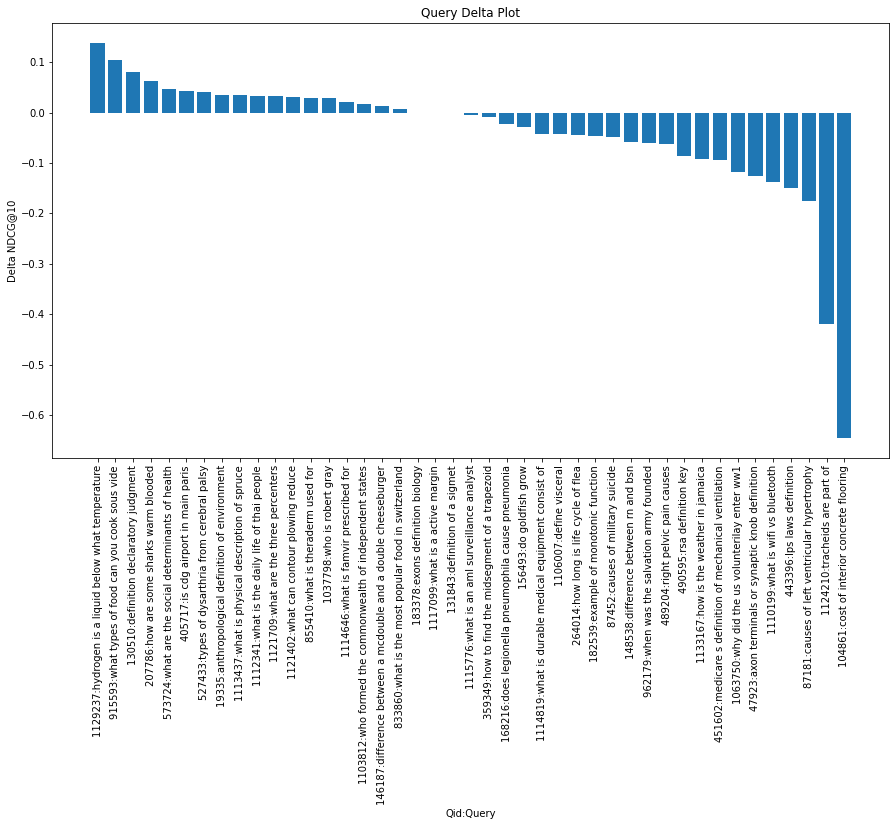

In [48]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.bar(sorted_condenser_df["qid:query"], sorted_condenser_df["delta"])
plt.title("Query Delta Plot")
plt.xlabel("Qid:Query")
plt.ylabel("Delta NDCG@10")
plt.xticks(rotation=90)

In [51]:
print("Improved Queries: ", sorted_condenser_df[sorted_condenser_df['delta']>0].count()[0])
print("Negative Impact Queries: ", sorted_condenser_df[sorted_condenser_df['delta']<0].count()[0])
print("Unchanged Queries: ", sorted_condenser_df[sorted_condenser_df['delta']==0].count()[0])

Improved Queries:  18
Negative Impact Queries:  22
Unchanged Queries:  3


In [49]:
sorted_coltacl_df.head(10)

,name,qid,measure,value,delta,query,qid:query
6,ANN >> ColTaCL_50K,1112341,nDCG@10,0.900503,0.152263,what is the daily life of thai people,1112341:what is the daily life of thai people
17,ANN >> ColTaCL_50K,130510,nDCG@10,0.943808,0.127353,definition declaratory judgment,130510:definition declaratory judgment
19,ANN >> ColTaCL_50K,146187,nDCG@10,0.995339,0.113523,difference between a mcdouble and a double che...,146187:difference between a mcdouble and a dou...
36,ANN >> ColTaCL_50K,573724,nDCG@10,0.737120,0.058957,what are the social determinants of health,573724:what are the social determinants of health
41,ANN >> ColTaCL_50K,915593,nDCG@10,0.797567,0.054602,what types of food can you cook sous vide,915593:what types of food can you cook sous vide
26,ANN >> ColTaCL_50K,207786,nDCG@10,0.627599,0.049137,how are some sharks warm blooded,207786:how are some sharks warm blooded
9,ANN >> ColTaCL_50K,1114819,nDCG@10,0.862291,0.048935,what is durable medical equipment consist of,1114819:what is durable medical equipment cons...
40,ANN >> ColTaCL_50K,87452,nDCG@10,0.586102,0.042128,causes of military suicide,87452:causes of military suicide
13,ANN >> ColTaCL_50K,1121709,nDCG@10,0.833236,0.018338,what are the three percenters,1121709:what are the three percenters
15,ANN >> ColTaCL_50K,1129237,nDCG@10,0.511171,0.012144,hydrogen is a liquid below what temperature,1129237:hydrogen is a liquid below what temper...


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 <a list of 43 Text major ticklabel objects>)

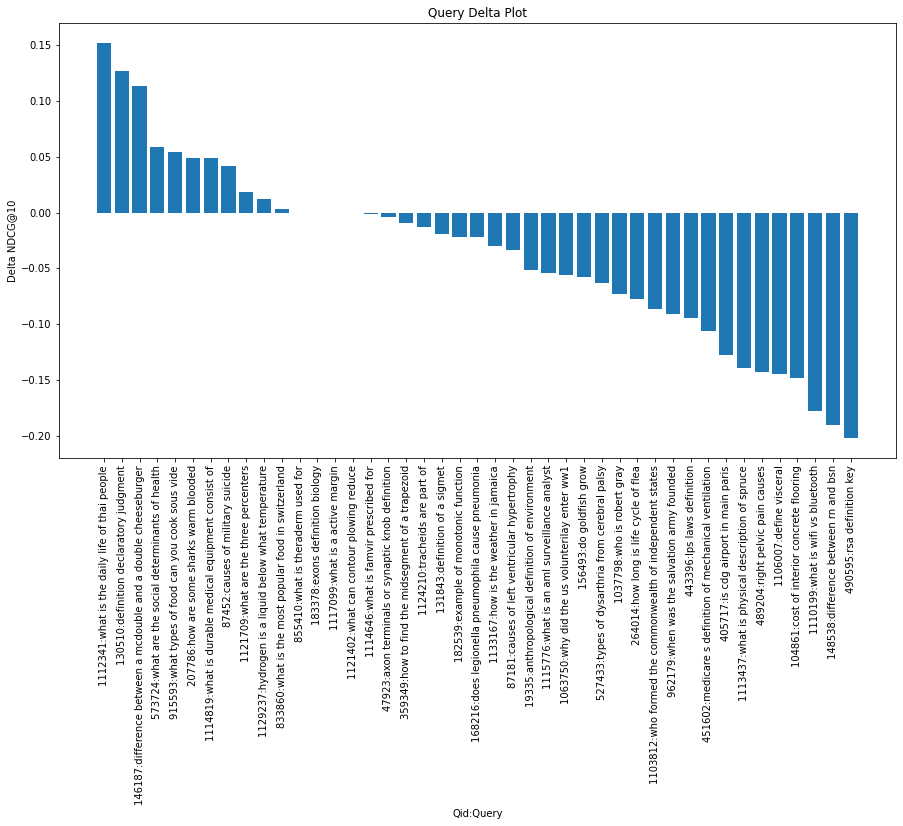

In [50]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.bar(sorted_coltacl_df["qid:query"], sorted_coltacl_df["delta"])
plt.title("Query Delta Plot")
plt.xlabel("Qid:Query")
plt.ylabel("Delta NDCG@10")
plt.xticks(rotation=90)

In [52]:
print("Improved Queries: ", sorted_coltacl_df[sorted_coltacl_df['delta']>0].count()[0])
print("Negative Impact Queries: ", sorted_coltacl_df[sorted_coltacl_df['delta']<0].count()[0])
print("Unchanged Queries: ", sorted_coltacl_df[sorted_coltacl_df['delta']==0].count()[0])

Improved Queries:  11
Negative Impact Queries:  28
Unchanged Queries:  4


# **Deep Dive**

In [27]:
colbert_baseline = colbert_factory.text_scorer()(colbert_2019)
colCondenser = colCondenser_factory.text_scorer()(colbert_2019)
colTaCL = coltacl_factory.text_scorer()(colbert_2019)

In [28]:
baseline_merge = pd.merge(colbert_baseline.groupby('qid').head(100), colbert_2019, how='left', on = 'docno')
baseline_merge.drop(['qid_y', 'rank_y','score_y','query_y'], axis=1, inplace=True)
baseline_merge.rename(columns={'qid_x': 'qid', 'query_x': 'query', 'score_x':'score', 'rank_x':'rank','text':'document'}, inplace=True)

In [29]:
colcondenser_merge = pd.merge(colCondenser.groupby('qid').head(100), colbert_2019, how='left', on = 'docno')
colcondenser_merge.drop(['qid_y', 'rank_y','score_y','query_y'], axis=1, inplace=True)
colcondenser_merge.rename(columns={'qid_x': 'qid', 'query_x': 'query', 'score_x':'score', 'rank_x':'rank','text':'document'}, inplace=True)

In [30]:
coltacl_merge = pd.merge(colTaCL.groupby('qid').head(100), colbert_2019, how='left', on = 'docno')
coltacl_merge.drop(['qid_y', 'rank_y','score_y','query_y'], axis=1, inplace=True)
coltacl_merge.rename(columns={'qid_x': 'qid', 'query_x': 'query', 'score_x':'score', 'rank_x':'rank','text':'document'}, inplace=True)

In [31]:
qrels = pt.get_dataset('msmarco_passage').get_qrels('test-2019')

df1 = baseline_merge.groupby('qid').head(10)
df2 = colcondenser_merge.groupby('qid').head(10)
df3 = coltacl_merge.groupby('qid').head(10)

#colbert
df1 = baseline_merge.groupby('qid').head(10)
df1 = pd.merge(df1, qrels, how='left', on = ['qid','docno'])

#colcondenser
df2 = colcondenser_merge.groupby('qid').head(10)
df2 = pd.merge(df2, qrels, how='left', on = ['qid','docno'])

#coltacl
df3 = coltacl_merge.groupby('qid').head(10)
df3 = pd.merge(df3, qrels, how='left', on = ['qid','docno'])

In [32]:
# calculate difference between ranking order of colbert and colcondenser model
df4 = pd.merge(df1, df2, how='left', on = ['qid','docno'])
df4['rank_difference'] = df4["rank_x"] - df4['rank_y']  
df4 = df4.sort_values(by=['rank_difference'], ascending=False)
df4.drop(['query_y', 'document_y', 'label_y'], axis=1, inplace=True)
df4.rename(columns={'query_x': 'query', 'score_x':'score', 'rank_x':'rank','document_x':'document', 'label_x': 'label'}, inplace=True)

# calculate difference between ranking order of colbert and coltacl model
df5 = pd.merge(df1, df3, how='left', on = ['qid','docno'])
df5['rank_difference'] = df5["rank_x"] - df5['rank_y']  
df5 = df5.sort_values(by=['rank_difference'], ascending=False)
df5.drop(['query_y', 'document_y', 'label_y'], axis=1, inplace=True)
df5.rename(columns={'query_x': 'query', 'score_x':'score', 'rank_x':'rank','document_x':'document', 'label_x': 'label'}, inplace=True)

In [54]:
df4[df4["qid"] == "1129237"] # colcondenser rank difference

,qid,query,docno,score,rank,name_x,document,label,score_y,rank_y,name_y,rank_difference
156,1129237,hydrogen is a liquid below what temperature,4254811,25.964020,6,pyterrier,At STP (standard temperature and pressure) hyd...,3.0,25.404781,4.0,pyterrier,2.0
157,1129237,hydrogen is a liquid below what temperature,128989,25.797859,7,pyterrier,Confidence votes 11.4K. At STP (standard tempe...,3.0,25.368637,5.0,pyterrier,2.0
154,1129237,hydrogen is a liquid below what temperature,128984,26.388453,4,pyterrier,Hydrogen gas has the molecular formula H 2. At...,3.0,25.493279,3.0,pyterrier,1.0
152,1129237,hydrogen is a liquid below what temperature,8588219,26.872704,2,pyterrier,User: Hydrogen is a liquid below what temperat...,3.0,25.830439,1.0,pyterrier,1.0
153,1129237,hydrogen is a liquid below what temperature,6080460,26.405020,3,pyterrier,Hydrogen can exist as a liquid under high pres...,3.0,25.644070,2.0,pyterrier,1.0
150,1129237,hydrogen is a liquid below what temperature,8588226,28.088638,0,pyterrier,Hydrogen is a liquid below what temperature? w...,0.0,26.265133,0.0,pyterrier,0.0
155,1129237,hydrogen is a liquid below what temperature,4254816,25.973007,5,pyterrier,Hydrogen is a liquid at -253 degree C and it i...,NaN,24.561838,7.0,pyterrier,-2.0
151,1129237,hydrogen is a liquid below what temperature,8588222,27.519045,1,pyterrier,Answer to: Hydrogen is a liquid below what tem...,0.0,25.356903,6.0,pyterrier,-5.0
158,1129237,hydrogen is a liquid below what temperature,3905057,25.418663,8,pyterrier,"Hydrogen is a colorless, odorless, tasteless g...",3.0,NaN,NaN,NaN,NaN
159,1129237,hydrogen is a liquid below what temperature,7350325,25.269562,9,pyterrier,Hydrogen cyanide is a colorless or pale-blue l...,0.0,NaN,NaN,NaN,NaN


In [53]:
df5[df5["qid"] == "1112341"] #coltacl rank difference

,qid,query,docno,score,rank,name_x,document,label,score_y,rank_y,name_y,rank_difference
62,1112341,what is the daily life of thai people,8139255,23.584921,2,pyterrier,An important thing in everyday life is SANUK. ...,3.0,23.466215,1.0,pyterrier,1.0
64,1112341,what is the daily life of thai people,8139256,22.788898,4,pyterrier,A n important thing in everyday life is SANUK....,3.0,23.089796,3.0,pyterrier,1.0
60,1112341,what is the daily life of thai people,8139257,25.438503,0,pyterrier,The following concepts are part of Thai everyd...,3.0,24.417307,0.0,pyterrier,0.0
63,1112341,what is the daily life of thai people,8139258,23.092144,3,pyterrier,T he following concepts are part of Thai every...,3.0,22.839064,4.0,pyterrier,-1.0
68,1112341,what is the daily life of thai people,2694636,22.462954,8,pyterrier,Thai Culture and Buddhist Traditions. 1 Thai ...,3.0,21.771002,9.0,pyterrier,-1.0
61,1112341,what is the daily life of thai people,8606160,24.612143,1,pyterrier,The Daily Life of a Thai Monk The Sangha World...,1.0,23.391014,2.0,pyterrier,-1.0
65,1112341,what is the daily life of thai people,6726344,22.670124,5,pyterrier,Thais must be the cleanest people in the world...,2.0,NaN,NaN,NaN,NaN
66,1112341,what is the daily life of thai people,6311801,22.553707,6,pyterrier,1 In Thai society Thai culture is such that pe...,3.0,NaN,NaN,NaN,NaN
67,1112341,what is the daily life of thai people,8606161,22.539762,7,pyterrier,"There are over 29,000 temples in Thailand and ...",NaN,NaN,NaN,NaN,NaN
69,1112341,what is the daily life of thai people,8442176,22.054552,9,pyterrier,This article is about the demographic features...,NaN,NaN,NaN,NaN,NaN


In [55]:
df1[df1["qid"] == "1112341"] #colbert

,qid,query,docno,score,rank,name,document,label
60,1112341,what is the daily life of thai people,8139257,25.438503,0,pyterrier,The following concepts are part of Thai everyd...,3.0
61,1112341,what is the daily life of thai people,8606160,24.612143,1,pyterrier,The Daily Life of a Thai Monk The Sangha World...,1.0
62,1112341,what is the daily life of thai people,8139255,23.584921,2,pyterrier,An important thing in everyday life is SANUK. ...,3.0
63,1112341,what is the daily life of thai people,8139258,23.092144,3,pyterrier,T he following concepts are part of Thai every...,3.0
64,1112341,what is the daily life of thai people,8139256,22.788898,4,pyterrier,A n important thing in everyday life is SANUK....,3.0
65,1112341,what is the daily life of thai people,6726344,22.670124,5,pyterrier,Thais must be the cleanest people in the world...,2.0
66,1112341,what is the daily life of thai people,6311801,22.553707,6,pyterrier,1 In Thai society Thai culture is such that pe...,3.0
67,1112341,what is the daily life of thai people,8606161,22.539762,7,pyterrier,"There are over 29,000 temples in Thailand and ...",NaN
68,1112341,what is the daily life of thai people,2694636,22.462954,8,pyterrier,Thai Culture and Buddhist Traditions. 1 Thai ...,3.0
69,1112341,what is the daily life of thai people,8442176,22.054552,9,pyterrier,This article is about the demographic features...,NaN


In [56]:
df3[df3["qid"] == "1112341"] #coltacl

,qid,query,docno,score,rank,name,document,label
60,1112341,what is the daily life of thai people,8139257,24.417307,0,pyterrier,The following concepts are part of Thai everyd...,3.0
61,1112341,what is the daily life of thai people,8139255,23.466215,1,pyterrier,An important thing in everyday life is SANUK. ...,3.0
62,1112341,what is the daily life of thai people,8606160,23.391014,2,pyterrier,The Daily Life of a Thai Monk The Sangha World...,1.0
63,1112341,what is the daily life of thai people,8139256,23.089796,3,pyterrier,A n important thing in everyday life is SANUK....,3.0
64,1112341,what is the daily life of thai people,8139258,22.839064,4,pyterrier,T he following concepts are part of Thai every...,3.0
65,1112341,what is the daily life of thai people,2694635,22.231304,5,pyterrier,Thailand is nearly 94%-95% Theravada Buddhist ...,2.0
66,1112341,what is the daily life of thai people,6726340,22.180420,6,pyterrier,Several things that relate to Thai people. The...,3.0
67,1112341,what is the daily life of thai people,2694631,21.984604,7,pyterrier,"Statue of a mythical Kinnon at Wat Phra Kaew, ...",3.0
68,1112341,what is the daily life of thai people,2694632,21.830484,8,pyterrier,Thailand's culture incorporates a great deal o...,3.0
69,1112341,what is the daily life of thai people,2694636,21.771002,9,pyterrier,Thai Culture and Buddhist Traditions. 1 Thai ...,3.0


In [37]:
df2[df2["qid"] == "962179"] #colcondenser

,qid,query,docno,score,rank,name,document,label
420,962179,when was the salvation army founded,5653659,29.016712,0,pyterrier,The Salvation Army was founded in London's Eas...,3.0
421,962179,when was the salvation army founded,2978866,29.010365,1,pyterrier,The Salvation Army was founded in Londonâs E...,3.0
422,962179,when was the salvation army founded,8785371,28.107489,2,pyterrier,The history of the Salvation Army began in 186...,3.0
423,962179,when was the salvation army founded,2329699,27.597467,3,pyterrier,History. The Salvation Army began in 1865 when...,3.0
424,962179,when was the salvation army founded,4606386,27.334988,4,pyterrier,Since The Salvation Army was born on the stree...,3.0
425,962179,when was the salvation army founded,8785374,27.200411,5,pyterrier,"The Salvation Army, founded by William and Cat...",0.0
426,962179,when was the salvation army founded,536176,27.085049,6,pyterrier,"The movement, founded in 1865 by William Booth...",3.0
427,962179,when was the salvation army founded,2978864,26.650463,7,pyterrier,"In Summaryâ¦. The Salvation Army, an evangeli...",3.0
428,962179,when was the salvation army founded,2978869,26.580025,8,pyterrier,The Salvation Army began its work in Canada in...,0.0
429,962179,when was the salvation army founded,4511499,26.502859,9,pyterrier,The Salvation Army is an integral part of the ...,3.0


## **Query and Document Interaction matrix**

In [57]:
plt.rcParams['figure.dpi'] = 150

In [58]:
def explain_text(self, query : str, document : str):
        """
        Provides a diagram explaining the interaction between a query and the text of a document
        """
        embsD, idsD = self.args.inference.docFromText([document], with_ids=True)
        return _explain(self, query, embsD, idsD)
    
def _explain(self, query, embsD, idsD):
    embsQ, idsQ, masksQ = self.args.inference.queryFromText([query], with_ids=True)

    interaction = (embsQ[0] @ embsD[0].T).cpu().numpy().T

    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    tokenmap = {"[unused1]" : "[D]", "[unused0]" : "[Q]"}

    fig = plt.figure(figsize=(4, 12)) 
    gs = GridSpec(2, 1, height_ratios=[1, 20]) 

    ax1=fig.add_subplot(gs[0])
    ax2=fig.add_subplot(gs[1])
    
    ax2.matshow(interaction, cmap=plt.cm.Blues)

    qtokens = self.args.inference.query_tokenizer.tok.convert_ids_to_tokens(idsQ[0])
    dtokens = self.args.inference.query_tokenizer.tok.convert_ids_to_tokens(idsD[0])
    qtokens = [tokenmap[t] if t in tokenmap else t for t in qtokens]
    dtokens = [tokenmap[t] if t in tokenmap else t for t in dtokens]

    ax2.set_xticks(range(32), minor=False)
    ax2.set_xticklabels(qtokens, rotation=90)
    ax2.set_yticks(range(len(idsD[0])))
    ax2.set_yticklabels(dtokens)
    ax2.set_anchor("N")

    contributions=[]
    for i in range(32):
        maxpos = np.argmax(interaction[:,i])
        plt.text(i-0.25, maxpos+0.1, "X", fontsize=5)
        contributions.append(interaction[maxpos,i])

    from sklearn.preprocessing import minmax_scale
    ax1.bar([0.5 + i for i in range(0,32)], contributions, color=plt.cm.Blues(minmax_scale(contributions, feature_range=(0.4, 1))))
    ax1.set_xlim([0,32])
    ax1.set_xticklabels([])
    fig.tight_layout()
    return fig

## Colbert vs ColTacL

In [60]:
doc = df3[df3["qid"] == "1112341"].iloc[0][6]
query = df3[df3["qid"] == "1112341"].iloc[0][1]

print("Document: ",doc)
print("Query: ",query)

Document:  The following concepts are part of Thai everyday life: à¹à¸à¹à¸¢à¹à¸ or JAI YEN is more a way of life, it is to keep your temper whatever the situation.
Query:  what is the daily life of thai people


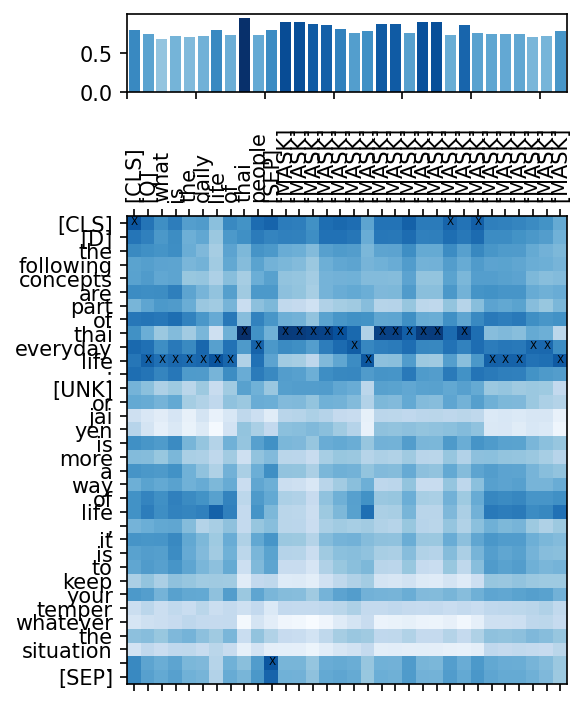

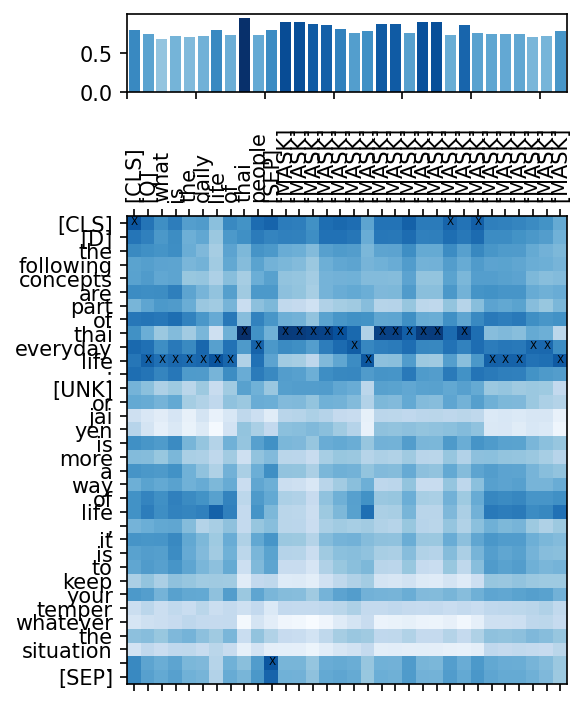

In [61]:
explain_text(colbert_factory, query=query, document = doc)

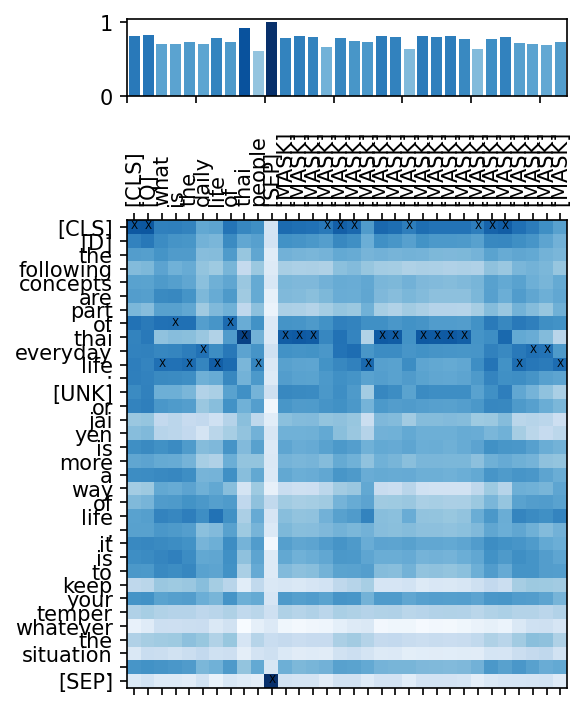

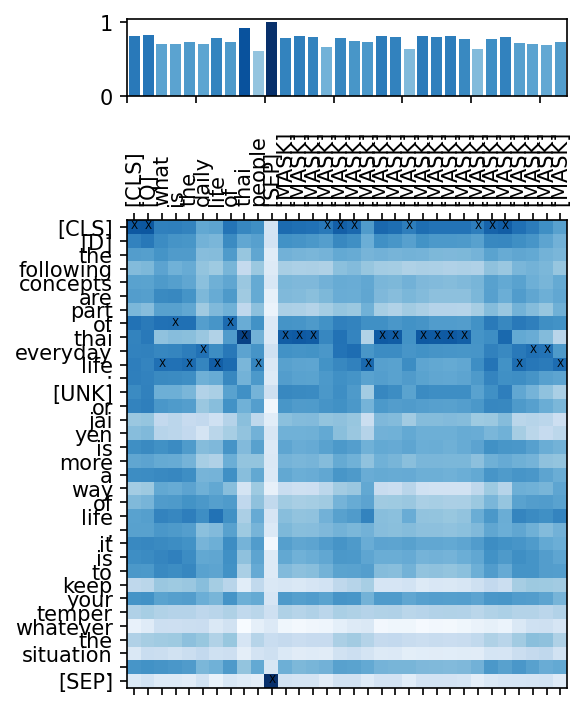

In [62]:
explain_text(coltacl_factory, query=query, document = doc)

## ColBERT vs ColCondenser

In [63]:
doc = df2[df2["qid"] == "1129237"].iloc[0][6]
query = df2[df2["qid"] == "1129237"].iloc[0][1]

print("Document: ",doc)
print("Query: ",query)

Document:  Hydrogen is a liquid below what temperature? was asked by Shelly Notetaker on May 31 2017. 426 students have viewed the answer on StudySoup. View the answer on StudySoup. Sign Up Login
Query:  hydrogen is a liquid below what temperature


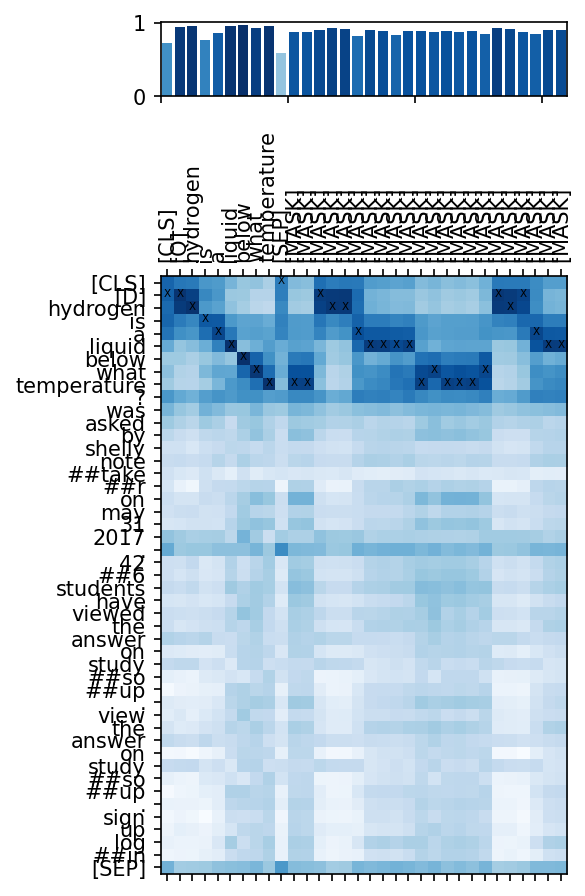

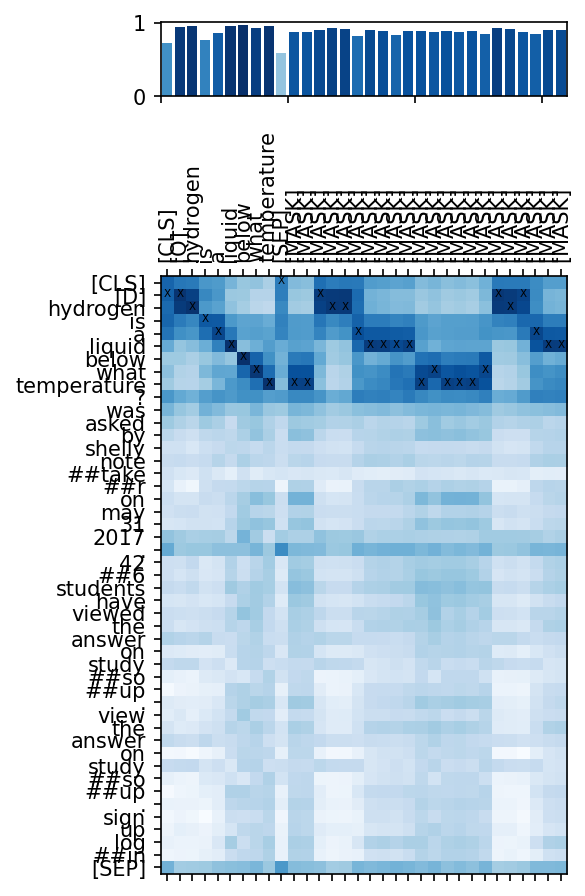

In [64]:
explain_text(colbert_factory, query=query, document = doc)

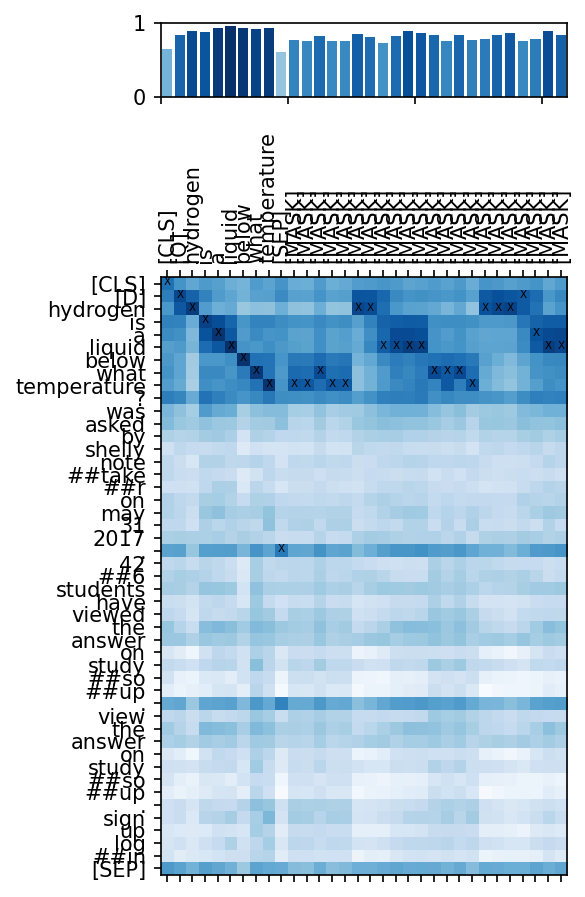

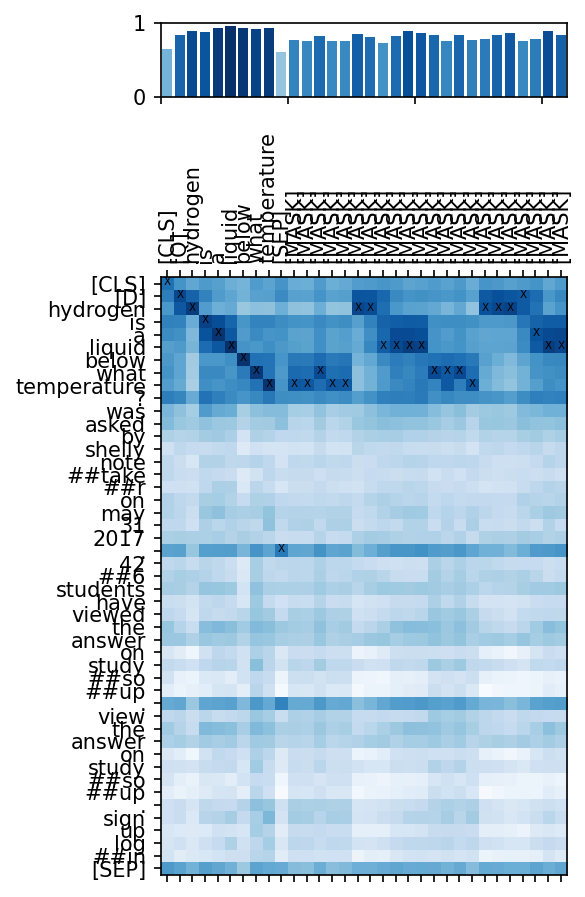

In [65]:
explain_text(colCondenser_factory, query=query, document = doc)